# Predicting FIFA World Cup 2026 Outcomes Using SQL and Machine Learning in Python

Team Members:\
    Prithika Kandasamy\
    Hemant Kumaar Aruljothi

## Introduction
The FIFA World Cup 2026 represents one of the most anticipated global sporting events, bringing together the strongest national football teams from around the world. Predicting match outcomes in international football is a complex task due to the influence of team strength, home advantage, tournament context, and environmental conditions.

This project aims to develop a data-driven framework to predict international football match outcomes in preparation for FIFA World Cup 2026. Using historical match data, Elo rating systems, tournament information, and environmental factors, the analysis integrates structured SQL-based data management with Python-based exploratory data analysis and machine learning modeling.

The primary objective is to evaluate whether team strength differences (measured using Elo ratings), home advantage, and contextual features can effectively predict match outcomes (home win, draw, away win). Additionally, the project investigates whether environmental variables such as weather conditions contribute meaningful predictive power.

By combining relational database design with statistical modeling, this project demonstrates a complete end-to-end data science workflow — from data ingestion and cleaning to feature engineering, exploratory analysis, and predictive modeling.


## Data Sources
This project integrates multiple publicly available datasets to construct a comprehensive database for international football match prediction.

1. International Football Results (1872–2017)
Source: Kaggle – International Football Results from 1872 to 2017
It forms the core dataset used to model match outcomes and generate Elo ratings.

2. World Cup Database
Source: Kaggle – World Cup Database
It enables structured relational analysis and demonstrates SQL database integration within the project.

3. Weather Dataset
Source: Kaggle – Weather Data
Weather data is incorporated to investigate whether environmental conditions influence match outcomes.

4. Elo Ratings (Computed Feature)
Rather than using external rankings directly, Elo ratings were calculated using historical match outcomes. Elo ratings provide a dynamic measure of team strength over time and serve as the primary predictive feature in the modeling phase.

Data Integration Strategy
All datasets were stored and managed within a SQLite relational database. Python was used for cleaning, feature engineering, and modeling, while SQL ensured structured data organization and relational consistency.

## Data Loading

In [2]:
# import necessary libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
import sys
import shutil
from pathlib import Path

C:\Users\prith\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Download international football results from 1872 to 2017 dataset from kaggle
path = kagglehub.dataset_download("martj42/international-football-results-from-1872-to-2017")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\prith\.cache\kagglehub\datasets\martj42\international-football-results-from-1872-to-2017\versions\108


In [4]:
# List the tables in the international football results from 1872 to 2017 dataset
print(os.listdir(path))

['former_names.csv', 'goalscorers.csv', 'results.csv', 'shootouts.csv']


In [5]:
# Transfer file to the data folder
source_path = Path(path)
destination_path = Path("../data")

for file in source_path.glob("*.csv"):
    shutil.copy(file, destination_path / file.name)

print("Files moved to data folder.")

Files moved to data folder.


In [6]:
# Storing result table in a variabe result
results = pd.read_csv("../data/results.csv")
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [7]:
# Get number of rows and columns
results.shape

(49071, 9)

In [8]:
# Get names of the columns
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [9]:
# Check for null values and data types of the columns
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49071 entries, 0 to 49070
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        49071 non-null  object
 1   home_team   49071 non-null  object
 2   away_team   49071 non-null  object
 3   home_score  49071 non-null  int64 
 4   away_score  49071 non-null  int64 
 5   tournament  49071 non-null  object
 6   city        49071 non-null  object
 7   country     49071 non-null  object
 8   neutral     49071 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


The dataset contains 49,071 international matches with no missing values, indicating strong data completeness. It includes match dates, teams, scores, tournament type, location, and a neutral venue indicator. The goal variables are correctly stored as numeric types, while the date column requires conversion to datetime for time-based analysis and feature engineering.

In [10]:
# Storing goalscorers table in a variabe goalscorers
goalscorers = pd.read_csv("../data/goalscorers.csv")
goalscorers.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [11]:
# Get number of rows and columns for goalscorers
goalscorers.shape

(47555, 8)

In [12]:
goalscorers.columns

Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')

In [13]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47555 entries, 0 to 47554
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       47555 non-null  object 
 1   home_team  47555 non-null  object 
 2   away_team  47555 non-null  object 
 3   team       47555 non-null  object 
 4   scorer     47507 non-null  object 
 5   minute     47299 non-null  float64
 6   own_goal   47555 non-null  bool   
 7   penalty    47555 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.3+ MB


The goalscorers dataset contains 47,555 goal-level records with detailed information about scorers, match context, 
and goal timing. While most fields are complete, a small number of missing values exist in the scorer and minute columns. 
The dataset includes useful binary indicators for own goals and penalties, which may support deeper match analysis. 
The date column requires conversion to datetime format for consistency with the main match dataset.

In [14]:
# Storing result table in a variabe result
shootouts = pd.read_csv("../data/shootouts.csv")
shootouts.head()

,date,home_team,away_team,winner,first_shooter
0,1967-08-22,India,Taiwan,Taiwan,NaN
1,1971-11-14,South Korea,Vietnam Republic,South Korea,NaN
2,1972-05-07,South Korea,Iraq,Iraq,NaN
3,1972-05-17,Thailand,South Korea,South Korea,NaN
4,1972-05-19,Thailand,Cambodia,Thailand,NaN


In [15]:
shootouts.shape

(665, 5)

In [16]:
shootouts.columns

Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')

In [17]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           665 non-null    object
 1   home_team      665 non-null    object
 2   away_team      665 non-null    object
 3   winner         665 non-null    object
 4   first_shooter  240 non-null    object
dtypes: object(5)
memory usage: 26.1+ KB


The shootouts dataset contains 665 penalty shootout records, including match date, participating teams, and the winning side. The first_shooter column has a substantial number of missing values and may not be essential for outcome prediction. All columns are currently stored as object types, and the date field should be converted to datetime format for consistency with other match datasets.

In [18]:
# Download world cup database dataset from kaggle
path2 = kagglehub.dataset_download("joshfjelstul/world-cup-database")

print("Path to dataset files:", path2)

Path to dataset files: C:\Users\prith\.cache\kagglehub\datasets\joshfjelstul\world-cup-database\versions\1


In [19]:
# List the tables in the world cup database dataset
print(os.listdir(path2))

['awards.csv', 'award_winners.csv', 'bookings.csv', 'confederations.csv', 'goals.csv', 'groups.csv', 'group_standings.csv', 'host_countries.csv', 'managers.csv', 'manager_appearances.csv', 'manager_appointments.csv', 'matches.csv', 'penalty_kicks.csv', 'players.csv', 'player_appearances.csv', 'qualified_teams.csv', 'referees.csv', 'referee_appearances.csv', 'referee_appointments.csv', 'squads.csv', 'stadiums.csv', 'substitutions.csv', 'teams.csv', 'team_appearances.csv', 'tournaments.csv', 'tournament_stages.csv', 'tournament_standings.csv']


In [20]:
# move the datasets of world cup database to the data folder
source_path = Path(path2)
destination_path = Path("../data")

for file in source_path.glob("*.csv"):
    shutil.copy(file, destination_path / file.name)

print("Files moved to data folder.")

Files moved to data folder.


In [21]:
# Storing matches table in a variabe matches
matches = pd.read_csv("../data/matches.csv")
matches.head()

,key_id,tournament_id,tournament_name,match_id,match_name,stage_name,group_name,group_stage,knockout_stage,replayed,...,away_team_score_margin,extra_time,penalty_shootout,score_penalties,home_team_score_penalties,away_team_score_penalties,result,home_team_win,away_team_win,draw
0,1,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,group stage,Group 1,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
1,2,WC-1930,1930 FIFA World Cup,M-1930-02,United States v Belgium,group stage,Group 4,1,0,0,...,-3,0,0,0-0,0,0,home team win,1,0,0
2,3,WC-1930,1930 FIFA World Cup,M-1930-03,Yugoslavia v Brazil,group stage,Group 2,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0
3,4,WC-1930,1930 FIFA World Cup,M-1930-04,Romania v Peru,group stage,Group 3,1,0,0,...,-2,0,0,0-0,0,0,home team win,1,0,0
4,5,WC-1930,1930 FIFA World Cup,M-1930-05,Argentina v France,group stage,Group 1,1,0,0,...,-1,0,0,0-0,0,0,home team win,1,0,0


In [22]:
matches.shape

(900, 37)

In [23]:
matches.columns

Index(['key_id', 'tournament_id', 'tournament_name', 'match_id', 'match_name',
       'stage_name', 'group_name', 'group_stage', 'knockout_stage', 'replayed',
       'replay', 'match_date', 'match_time', 'stadium_id', 'stadium_name',
       'city_name', 'country_name', 'home_team_id', 'home_team_name',
       'home_team_code', 'away_team_id', 'away_team_name', 'away_team_code',
       'score', 'home_team_score', 'away_team_score', 'home_team_score_margin',
       'away_team_score_margin', 'extra_time', 'penalty_shootout',
       'score_penalties', 'home_team_score_penalties',
       'away_team_score_penalties', 'result', 'home_team_win', 'away_team_win',
       'draw'],
      dtype='object')

In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   key_id                     900 non-null    int64 
 1   tournament_id              900 non-null    object
 2   tournament_name            900 non-null    object
 3   match_id                   900 non-null    object
 4   match_name                 900 non-null    object
 5   stage_name                 900 non-null    object
 6   group_name                 900 non-null    object
 7   group_stage                900 non-null    int64 
 8   knockout_stage             900 non-null    int64 
 9   replayed                   900 non-null    int64 
 10  replay                     900 non-null    int64 
 11  match_date                 900 non-null    object
 12  match_time                 900 non-null    object
 13  stadium_id                 900 non-null    object
 14  stadium_na

The World Cup matches dataset contains 900 tournament-level match records with detailed contextual information, including tournament stage, stadium, location, team identifiers, and match outcomes. The dataset is fully complete with no missing values, and numeric score-related variables are correctly stored as integers. The match_date and match_time fields are currently stored as objects and should be converted to datetime format for time-based analysis. This dataset provides structured relational information suitable for SQL-based integration and tournament-specific modeling.

In [25]:
# Storing players table in a variabe players
players = pd.read_csv("../data/players.csv")
players.head()

,key_id,player_id,family_name,given_name,birth_date,goal_keeper,defender,midfielder,forward,count_tournaments,list_tournaments,player_wikipedia_link
0,1,P-05074,A'Court,Alan,1934-09-30,0,0,0,1,1,1958,https://en.wikipedia.org/wiki/Alan_A%27Court
1,2,P-00942,Abadzhiev,Stefan,1934-07-03,0,0,0,1,1,1966,https://en.wikipedia.org/wiki/Stefan_Abadzhiev
2,3,P-03051,Abalo,Jean-Paul,1975-06-26,0,1,0,0,1,2006,https://en.wikipedia.org/wiki/Jean-Paul_Abalo
3,4,P-03371,Abanda,Patrice,1978-08-03,0,1,0,0,1,1998,https://en.wikipedia.org/wiki/Patrice_Abanda
4,5,P-04977,Abate,Ignazio,1986-11-12,0,1,0,0,1,2014,https://en.wikipedia.org/wiki/Ignazio_Abate


In [26]:
players.shape

(7907, 12)

In [27]:
players.columns

Index(['key_id', 'player_id', 'family_name', 'given_name', 'birth_date',
       'goal_keeper', 'defender', 'midfielder', 'forward', 'count_tournaments',
       'list_tournaments', 'player_wikipedia_link'],
      dtype='object')

In [28]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   key_id                 7907 non-null   int64 
 1   player_id              7907 non-null   object
 2   family_name            7907 non-null   object
 3   given_name             7907 non-null   object
 4   birth_date             7906 non-null   object
 5   goal_keeper            7907 non-null   int64 
 6   defender               7907 non-null   int64 
 7   midfielder             7907 non-null   int64 
 8   forward                7907 non-null   int64 
 9   count_tournaments      7907 non-null   int64 
 10  list_tournaments       7907 non-null   object
 11  player_wikipedia_link  7907 non-null   object
dtypes: int64(6), object(6)
memory usage: 741.4+ KB


The players dataset contains 7,907 unique World Cup player records, including identification details, position indicators, and tournament participation history. The dataset is nearly complete, with only one missing value in the birth_date column. Positional roles are represented as binary indicators, which may support categorical analysis. The birth_date field should be converted to datetime format for potential age-based feature engineering.

In [29]:
# Storing teams table in a variabe teams
teams = pd.read_csv("../data/teams.csv")
teams.head()

,key_id,team_id,team_name,team_code,federation_name,region_name,confederation_id,confederation_name,confederation_code,team_wikipedia_link,federation_wikipedia_link
0,1,T-01,Algeria,DZA,Algerian Football Federation,Africa,CF-2,Confederation of African Football,CAF,https://en.wikipedia.org/wiki/Algeria_national...,https://en.wikipedia.org/wiki/Algerian_Footbal...
1,2,T-02,Angola,AGO,Angolan Football Federation,Africa,CF-2,Confederation of African Football,CAF,https://en.wikipedia.org/wiki/Angola_national_...,https://en.wikipedia.org/wiki/Angolan_Football...
2,3,T-03,Argentina,ARG,Argentine Football Association,South America,CF-4,South American Football Confederation,CONMEBOL,https://en.wikipedia.org/wiki/Argentina_nation...,https://en.wikipedia.org/wiki/Argentine_Footba...
3,4,T-04,Australia,AUS,Football Australia,Oceania,CF-1,Asian Football Confederation,AFC,https://en.wikipedia.org/wiki/Australia_men%27...,https://en.wikipedia.org/wiki/Football_Australia
4,5,T-05,Austria,AUT,Austrian Football Association,Europe,CF-6,Union of European Football Associations,UEFA,https://en.wikipedia.org/wiki/Austria_national...,https://en.wikipedia.org/wiki/Austrian_Footbal...


In [30]:
teams.shape

(84, 11)

In [31]:
teams.columns

Index(['key_id', 'team_id', 'team_name', 'team_code', 'federation_name',
       'region_name', 'confederation_id', 'confederation_name',
       'confederation_code', 'team_wikipedia_link',
       'federation_wikipedia_link'],
      dtype='object')

In [32]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   key_id                     84 non-null     int64 
 1   team_id                    84 non-null     object
 2   team_name                  84 non-null     object
 3   team_code                  84 non-null     object
 4   federation_name            84 non-null     object
 5   region_name                84 non-null     object
 6   confederation_id           84 non-null     object
 7   confederation_name         84 non-null     object
 8   confederation_code         84 non-null     object
 9   team_wikipedia_link        84 non-null     object
 10  federation_wikipedia_link  84 non-null     object
dtypes: int64(1), object(10)
memory usage: 7.3+ KB


The teams dataset contains 84 World Cup national teams along with federation and confederation information. The dataset is fully complete with no missing values and includes structured identifiers such as team_id and confederation_id, which support relational joins with match and player tables. This table enables regional and confederation-level analysis within tournament contexts.

In [33]:
# Storing goals table in a variabe goals
goals = pd.read_csv("../data/goals.csv")
goals.head()

,key_id,goal_id,tournament_id,tournament_name,match_id,match_name,match_date,stage_name,group_name,team_id,...,shirt_number,player_team_id,player_team_name,player_team_code,minute_label,minute_regulation,minute_stoppage,match_period,own_goal,penalty
0,1,G-0001,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,19',19,0,first half,0,0
1,2,G-0002,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,40',40,0,first half,0,0
2,3,G-0003,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,43',43,0,first half,0,0
3,4,G-0004,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-28,...,0,T-28,France,FRA,87',87,0,second half,0,0
4,5,G-0005,WC-1930,1930 FIFA World Cup,M-1930-01,France v Mexico,1930-07-13,group stage,Group 1,T-44,...,0,T-44,Mexico,MEX,70',70,0,second half,0,0


In [34]:
goals.shape

(2548, 27)

In [35]:
goals.columns

Index(['key_id', 'goal_id', 'tournament_id', 'tournament_name', 'match_id',
       'match_name', 'match_date', 'stage_name', 'group_name', 'team_id',
       'team_name', 'team_code', 'home_team', 'away_team', 'player_id',
       'family_name', 'given_name', 'shirt_number', 'player_team_id',
       'player_team_name', 'player_team_code', 'minute_label',
       'minute_regulation', 'minute_stoppage', 'match_period', 'own_goal',
       'penalty'],
      dtype='object')

In [36]:
goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   key_id             2548 non-null   int64 
 1   goal_id            2548 non-null   object
 2   tournament_id      2548 non-null   object
 3   tournament_name    2548 non-null   object
 4   match_id           2548 non-null   object
 5   match_name         2548 non-null   object
 6   match_date         2548 non-null   object
 7   stage_name         2548 non-null   object
 8   group_name         2548 non-null   object
 9   team_id            2548 non-null   object
 10  team_name          2548 non-null   object
 11  team_code          2548 non-null   object
 12  home_team          2548 non-null   int64 
 13  away_team          2548 non-null   int64 
 14  player_id          2548 non-null   object
 15  family_name        2548 non-null   object
 16  given_name         2548 non-null   object


The goals dataset contains 2,548 World Cup goal-level records with detailed event information, including tournament context, match identifiers, scoring team, player details, and goal timing. The dataset is fully complete with no missing values. It provides granular event-level data that can support advanced analysis of scoring patterns, match dynamics, and player contributions. The match_date field should be converted to datetime format for consistency with other match datasets.

In [37]:
# Download weather data from kaggle
path3 = kagglehub.dataset_download("tombliss/weather-data")

print("Path to dataset files:", path3)

Path to dataset files: C:\Users\prith\.cache\kagglehub\datasets\tombliss\weather-data\versions\1


In [38]:
# List of tables from weather data
print(os.listdir(path3))

['games.csv', 'games_weather.csv', 'stadium_coordinates.csv']


In [39]:
source_path = Path(path3)
destination_path = Path("../data")

for file in source_path.glob("*.csv"):
    shutil.copy(file, destination_path / file.name)

print("Files moved to data folder.")

Files moved to data folder.


In [40]:
# store all the tables from the weather data in the variable weather
weather = []
for i in os.listdir(path3):
  df = pd.read_csv(path3 + '/' + i)
  weather.append(df)

weather = pd.concat(weather, axis=0, ignore_index=True)
weather.head()

,game_id,Season,StadiumName,TimeStartGame,TimeEndGame,TZOffset,Source,DistanceToStation,TimeMeasure,Temperature,...,Precipitation,WindSpeed,WindDirection,Pressure,EstimatedCondition,HomeTeam,RoofType,Longitude,Latitude,StadiumAzimuthAngle
0,2.000090e+09,2000.0,Giants Stadium,9/3/2000 13:00,9/3/2000 16:40,-4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.000090e+09,2000.0,Three Rivers Stadium,9/3/2000 13:00,9/3/2000 15:58,-4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.000090e+09,2000.0,FedExField,9/3/2000 13:00,9/3/2000 16:04,-4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.000090e+09,2000.0,U.S. Bank Stadium,9/3/2000 12:00,9/3/2000 15:08,-5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.000090e+09,2000.0,Mercedes-Benz Superdome,9/3/2000 12:00,9/3/2000 15:12,-5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
weather.shape

(42807, 22)

In [42]:
weather.columns

Index(['game_id', 'Season', 'StadiumName', 'TimeStartGame', 'TimeEndGame',
       'TZOffset', 'Source', 'DistanceToStation', 'TimeMeasure', 'Temperature',
       'DewPoint', 'Humidity', 'Precipitation', 'WindSpeed', 'WindDirection',
       'Pressure', 'EstimatedCondition', 'HomeTeam', 'RoofType', 'Longitude',
       'Latitude', 'StadiumAzimuthAngle'],
      dtype='object')

In [43]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42807 entries, 0 to 42806
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              42748 non-null  float64
 1   Season               5593 non-null   float64
 2   StadiumName          5652 non-null   object 
 3   TimeStartGame        5593 non-null   object 
 4   TimeEndGame          5593 non-null   object 
 5   TZOffset             5593 non-null   float64
 6   Source               37155 non-null  object 
 7   DistanceToStation    35512 non-null  float64
 8   TimeMeasure          37155 non-null  object 
 9   Temperature          37154 non-null  float64
 10  DewPoint             37154 non-null  float64
 11  Humidity             37154 non-null  float64
 12  Precipitation        34587 non-null  float64
 13  WindSpeed            37154 non-null  float64
 14  WindDirection        32384 non-null  float64
 15  Pressure             37134 non-null 

The weather dataset contains 42,807 environmental observations with variables such as temperature, humidity, precipitation, wind speed, and atmospheric pressure. However, several columns contain substantial missing values, particularly stadium-related information and home team identifiers, which limits direct integration with match-level data. The dataset may still support exploratory analysis of environmental effects on football matches where sufficient overlap exists. Careful filtering and aggregation are required before merging with the main match dataset.

## Database design
To organize the raw CSV datasets into a structured and queryable format, all data was stored in a SQLite relational database named `fifa26_prediction.sqlite`. SQLite was selected because it allows efficient SQL querying, structured schema management, and seamless integration with Python for analysis and modeling.

The database enables:
- Efficient filtering and aggregation using SQL (`SELECT`, `GROUP BY`, `JOIN`)
- Clear table organization
- Relational consistency between match, team, and player datasets
- Structured feature preparation before modeling

### Tables Created

The following tables were created in the database:

- **results** — International match results (date, teams, scores, location)
- **goalscorers** — Goal-level details (scorer, minute, own goal, penalty)
- **shootouts** — Penalty shootout outcomes
- **matches** — FIFA World Cup match metadata (stage, stadium, teams)
- **goals** — World Cup goal-level event data
- **players** — Player profiles and tournament participation
- **teams** — Team and confederation information
- **weather** — Environmental measurements (temperature, humidity, wind, etc.)


### Key Design Considerations

- A unique `match_id` was created for the `results` table to support structured analysis.
- World Cup tables use structured identifiers such as `match_id`, `team_id`, and `player_id`, enabling relational joins.
- Datetime fields were standardized to allow chronological analysis.
- Team names were cleaned to ensure consistent referencing across datasets.
- SQLite was used primarily for data organization and relational querying, while Python handled feature engineering and modeling.


In [44]:
# connect to sqlite database "fifa_prediction.sqlite"
conn = sqlite3.connect('fifa26_prediction.sqlite')

In [45]:
# Create results, fifa_ranking, players and weather tables and import data into it
results.to_sql('results', conn, if_exists='replace', index=False)
goalscorers.to_sql('goalscorers', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)
matches.to_sql('matches', conn, if_exists='replace', index=False)
players.to_sql('players', conn, if_exists='replace', index=False)
teams.to_sql('teams', conn, if_exists='replace', index=False)
goals.to_sql('goals', conn, if_exists='replace', index=False)
weather.to_sql('weather', conn, if_exists='replace', index=False)

42807

In [46]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,weather_obs
1,stadiums
2,results
3,goalscorers
4,shootouts
5,matches
6,players
7,teams
8,goals
9,weather


In [47]:
for t in ["results","goalscorers","matches","shootouts","players","teams","goals","weather"]:
    cols = pd.read_sql(f"PRAGMA table_info({t});", conn)
    print("\n", t)
    print(cols[["name","type"]])


 results
         name     type
0        date     TEXT
1   home_team     TEXT
2   away_team     TEXT
3  home_score  INTEGER
4  away_score  INTEGER
5  tournament     TEXT
6        city     TEXT
7     country     TEXT
8     neutral  INTEGER

 goalscorers
        name     type
0       date     TEXT
1  home_team     TEXT
2  away_team     TEXT
3       team     TEXT
4     scorer     TEXT
5     minute     REAL
6   own_goal  INTEGER
7    penalty  INTEGER

 matches
                         name     type
0                      key_id  INTEGER
1               tournament_id     TEXT
2             tournament_name     TEXT
3                    match_id     TEXT
4                  match_name     TEXT
5                  stage_name     TEXT
6                  group_name     TEXT
7                 group_stage  INTEGER
8              knockout_stage  INTEGER
9                    replayed  INTEGER
10                     replay  INTEGER
11                 match_date     TEXT
12                 match_time  

## Data cleaning and Feature engineering

In [48]:
# Clean results dataset
results["date"] = pd.to_datetime(results["date"], errors="coerce")
results["neutral"] = results["neutral"].astype(int)

# drop rows where date failed to parse
results = results.dropna(subset=["date"])

# Overwrite the existing table
results.to_sql("results", conn, if_exists="replace", index=False)

49071

In [49]:
pd.read_sql("PRAGMA table_info(results);", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,date,TIMESTAMP,0,None,0
1,1,home_team,TEXT,0,None,0
2,2,away_team,TEXT,0,None,0
3,3,home_score,INTEGER,0,None,0
4,4,away_score,INTEGER,0,None,0
5,5,tournament,TEXT,0,None,0
6,6,city,TEXT,0,None,0
7,7,country,TEXT,0,None,0
8,8,neutral,INTEGER,0,None,0


In [50]:
# Sort by date
results = results.sort_values("date").reset_index(drop=True)

# Add match_id
results["match_id"] = results.index + 1

# Save back to SQLite
results.to_sql("results", conn, if_exists="replace", index=False)

# Verify
pd.read_sql("SELECT match_id, date, home_team, away_team FROM results LIMIT 5;", conn)

,match_id,date,home_team,away_team
0,1,1872-11-30 00:00:00,Scotland,England
1,2,1873-03-08 00:00:00,England,Scotland
2,3,1874-03-07 00:00:00,Scotland,England
3,4,1875-03-06 00:00:00,England,Scotland
4,5,1876-03-04 00:00:00,Scotland,England


In [51]:
# Convert date to datetime
goalscorers["date"] = pd.to_datetime(goalscorers["date"], errors="coerce")

# Convert minute to numeric (safe)
goalscorers["minute"] = pd.to_numeric(goalscorers["minute"], errors="coerce")

# Ensure boolean columns are clean 0/1
goalscorers["own_goal"] = goalscorers["own_goal"].astype(int)
goalscorers["penalty"] = goalscorers["penalty"].astype(int)

# Drop rows where date failed
goalscorers = goalscorers.dropna(subset=["date"])

# Overwrite table
goalscorers.to_sql("goalscorers", conn, if_exists="replace", index=False)

47555

In [52]:
shootouts["date"] = pd.to_datetime(shootouts["date"], errors="coerce")

In [53]:
# column "first_shooter" contains so many missing values, so dropping shootouts["first_shooter"]
shootouts = shootouts.drop(columns=["first_shooter"])

In [54]:
shootouts["home_team_win_shootout"] = (
    shootouts["winner"] == shootouts["home_team"]
).astype(int)

In [55]:
shootouts.head()

,date,home_team,away_team,winner,home_team_win_shootout
0,1967-08-22,India,Taiwan,Taiwan,0
1,1971-11-14,South Korea,Vietnam Republic,South Korea,1
2,1972-05-07,South Korea,Iraq,Iraq,0
3,1972-05-17,Thailand,South Korea,South Korea,0
4,1972-05-19,Thailand,Cambodia,Thailand,1


In [56]:
shootouts.to_sql("shootouts", conn, if_exists="replace", index=False)

665

In [57]:
# Function to normalize team names
def normalize_team_names(series):
    return (
        series.astype(str)
        .str.strip()
        .str.lower()
        .str.replace(r"\s+", " ", regex=True)
    )

In [58]:
results["home_team"] = normalize_team_names(results["home_team"])
results["away_team"] = normalize_team_names(results["away_team"])

In [59]:
goalscorers["home_team"] = normalize_team_names(goalscorers["home_team"])
goalscorers["away_team"] = normalize_team_names(goalscorers["away_team"])
goalscorers["team"] = normalize_team_names(goalscorers["team"])

In [60]:
shootouts["home_team"] = normalize_team_names(shootouts["home_team"])
shootouts["away_team"] = normalize_team_names(shootouts["away_team"])

In [61]:
matches["home_team_name"] = normalize_team_names(matches["home_team_name"])
matches["away_team_name"] = normalize_team_names(matches["away_team_name"])

In [62]:
teams["team_name"] = normalize_team_names(teams["team_name"])

In [63]:
goals["match_date"] = pd.to_datetime(goals["match_date"], errors="coerce")

In [64]:
goals["team_name"] = normalize_team_names(goals["team_name"])
goals["player_team_name"] = normalize_team_names(goals["player_team_name"])

In [65]:
matches["match_date"] = pd.to_datetime(matches["match_date"], errors="coerce")

In [66]:
matches["home_team_name"] = normalize_team_names(matches["home_team_name"])
matches["away_team_name"] = normalize_team_names(matches["away_team_name"])
matches["country_name"] = normalize_team_names(matches["country_name"])

In [67]:
# drop redundant columns in match table
matches = matches.drop(columns=["result", "score", "score_penalties"])

In [68]:
# Verify for duplicates
matches.duplicated(subset=["match_id"]).sum()

np.int64(0)

In [69]:
players["birth_date"] = pd.to_datetime(players["birth_date"], errors="coerce")

In [70]:
# Normalize text function
def clean_text(s):
    return (
        s.astype(str)
         .str.strip()
         .str.replace(r"\s+", " ", regex=True)
         .replace({"nan": None})
    )

players["family_name"] = clean_text(players["family_name"])
players["given_name"]  = clean_text(players["given_name"])

In [71]:
# Ensure position flags are integers
pos_cols = ["goal_keeper","defender","midfielder","forward"]
players[pos_cols] = players[pos_cols].apply(lambda c: c.astype(int).clip(0, 1))

In [72]:
# Verify for duplicates
players.duplicated(subset=["player_id"]).sum()

np.int64(0)

In [73]:
# Strip whitespace from all object columns
obj_cols = teams.select_dtypes(include="object").columns
teams[obj_cols] = teams[obj_cols].apply(lambda s: s.str.strip())

In [74]:
# Standardize codes
teams["team_code"] = teams["team_code"].str.upper().str.replace(r"\s+", "", regex=True)

In [75]:
# Check duplicates
print("dup team_id:", teams.duplicated(subset=["team_id"]).sum())
print("dup team_code:", teams.duplicated(subset=["team_code"]).sum())

dup team_id: 0
dup team_code: 1


In [76]:
# Delete the duplicate value
teams = teams.drop_duplicates(subset=["team_code"]).reset_index(drop=True)

In [77]:
weather = weather.copy()

# Standardize column names 
weather.columns = [c.strip() for c in weather.columns]

# game_id should be integer-like
weather["game_id"] = pd.to_numeric(weather["game_id"], errors="coerce")

# Parse time columns 
for c in ["TimeStartGame", "TimeEndGame", "TimeMeasure"]:
    if c in weather.columns:
        weather[c] = pd.to_datetime(weather[c], errors="coerce")

# Strip text columns
obj_cols = weather.select_dtypes(include="object").columns
weather[obj_cols] = weather[obj_cols].apply(lambda s: s.str.strip())

# Drop rows with no game_id AND no stadium name (junk rows)
weather = weather.dropna(subset=["game_id", "StadiumName"], how="all")

# Convert Season to Int where possible
weather["Season"] = pd.to_numeric(weather["Season"], errors="coerce").astype("Int64")

In [78]:
# Dividing weather dataset into weather_obs and stadiums
weather_obs_cols = [
    "game_id","Season","StadiumName","TimeStartGame","TimeEndGame","TZOffset",
    "Source","DistanceToStation","TimeMeasure",
    "Temperature","DewPoint","Humidity","Precipitation",
    "WindSpeed","WindDirection","Pressure","EstimatedCondition"
]
weather_obs_cols = [c for c in weather_obs_cols if c in weather.columns]

weather_obs = weather[weather_obs_cols].copy()

# Keep only rows that actually have a game_id (for joining)
weather_obs = weather_obs.dropna(subset=["game_id"])
weather_obs["game_id"] = weather_obs["game_id"].astype("Int64")

In [79]:
stadium_cols = [
    "StadiumName","HomeTeam","RoofType","Longitude","Latitude","StadiumAzimuthAngle"
]
stadium_cols = [c for c in stadium_cols if c in weather.columns]

stadiums = weather[stadium_cols].dropna(subset=["StadiumName"]).copy()
stadiums = stadiums.drop_duplicates(subset=["StadiumName"]).reset_index(drop=True)

In [80]:
# Save changes back to SQL
results.to_sql('results', conn, if_exists='replace', index=False)
goalscorers.to_sql('goalscorers', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)
matches.to_sql('matches', conn, if_exists='replace', index=False)
players.to_sql('players', conn, if_exists='replace', index=False)
teams.to_sql('teams', conn, if_exists='replace', index=False)
goals.to_sql('goals', conn, if_exists='replace', index=False)
weather_obs.to_sql("weather_obs", conn, if_exists="replace", index=False)
stadiums.to_sql("stadiums", conn, if_exists="replace", index=False)

56

In [81]:
# Initialize elo dictionary
elo_ratings = {}
BASE_ELO = 1500
K = 20

In [82]:
# Define columns
results["home_elo"] = 0.0
results["away_elo"] = 0.0

In [83]:
# Expected score function
def expected_score(rating_a, rating_b):
    return 1 / (1 + 10 ** ((rating_b - rating_a) / 400))

In [84]:
# Looping through matches
for idx, row in results.iterrows():
    
    home = row["home_team"]
    away = row["away_team"]
    
    # Initialize teams if new
    if home not in elo_ratings:
        elo_ratings[home] = BASE_ELO
    if away not in elo_ratings:
        elo_ratings[away] = BASE_ELO
    
    home_elo = elo_ratings[home]
    away_elo = elo_ratings[away]
    
    # Store pre-match Elo
    results.at[idx, "home_elo"] = home_elo
    results.at[idx, "away_elo"] = away_elo
    
    # Expected scores
    exp_home = expected_score(home_elo, away_elo)
    exp_away = expected_score(away_elo, home_elo)
    
    # Actual result
    if row["home_score"] > row["away_score"]:
        actual_home = 1
        actual_away = 0
    elif row["home_score"] < row["away_score"]:
        actual_home = 0
        actual_away = 1
    else:
        actual_home = 0.5
        actual_away = 0.5
    
    # Update ratings
    elo_ratings[home] = home_elo + K * (actual_home - exp_home)
    elo_ratings[away] = away_elo + K * (actual_away - exp_away)

In [85]:
# Create elo difference feature
results["elo_diff"] = results["home_elo"] - results["away_elo"]

In [86]:
# Save to SQLite
results.to_sql("results", conn, if_exists="replace", index=False)

49071

In [87]:
# Create a variable "result_label"
results["goal_diff"] = results["home_score"] - results["away_score"]

results["result_label"] = results["goal_diff"].apply(
    lambda x: 1 if x > 0 else (0 if x == 0 else -1)
)

In [88]:
results["result_label"].value_counts()

result_label
 1    24043
-1    13872
 0    11156
Name: count, dtype: int64

In [89]:
results["date"] = results["date"].dt.strftime("%Y-%m-%d") 

In [123]:
results["date"] = pd.to_datetime(results["date"])
results["year"] = results["date"].dt.year

In [93]:
results["result_label"].isnull().sum()

np.int64(0)

In [94]:
results["result_label"].value_counts(normalize=True)

result_label
 1    0.489964
-1    0.282692
 0    0.227344
Name: proportion, dtype: float64

## Exploratory Data Analysis

In [95]:
# Check for number of home win, away win and draw
results.groupby("result_label")["elo_diff"].mean()

result_label
-1   -92.608210
 0   -11.023316
 1    76.391101
Name: elo_diff, dtype: float64

In [96]:
# Convert home win to binary
results["home_win"] = (results["result_label"] == 1).astype(int)

In [97]:
# Bin Elo difference
results["elo_bin"] = pd.cut(results["elo_diff"], bins=10)

win_rates = results.groupby("elo_bin")["home_win"].mean()

win_rates

C:\Users\prith\AppData\Local\Temp\ipykernel_24212\1288705571.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rates = results.groupby("elo_bin")["home_win"].mean()


elo_bin
(-863.785, -693.748]    0.000000
(-693.748, -525.394]    0.000000
(-525.394, -357.041]    0.043155
(-357.041, -188.687]    0.143857
(-188.687, -20.334]     0.329795
(-20.334, 148.02]       0.568145
(148.02, 316.373]       0.776338
(316.373, 484.727]      0.919175
(484.727, 653.08]       0.959538
(653.08, 821.434]       1.000000
Name: home_win, dtype: float64

The Elo validation results show a clear and consistent relationship between Elo difference and match outcomes. As the Elo difference increases (indicating a stronger home team relative to the away team), the home win rate rises steadily. When the Elo difference is strongly negative, the home win probability is very low, while large positive differences correspond to near-certain home victories. This monotonic pattern confirms that the Elo ratings were computed correctly and that Elo difference is a meaningful and powerful predictor for match outcomes in the FIFA 2026 prediction model.

In [98]:
results[["elo_diff", "home_win"]].corr()

,elo_diff,home_win
elo_diff,1.000000,0.417083
home_win,0.417083,1.000000


In [99]:
# Simple numeric features
results["goal_diff"]   = results["home_score"] - results["away_score"]
results["total_goals"] = results["home_score"] + results["away_score"]

In [100]:
print(results["result_label"].value_counts(dropna=False))

result_label
 1    24043
-1    13872
 0    11156
Name: count, dtype: int64


In [102]:
outcome_counts = results["result_label"].value_counts().sort_index()

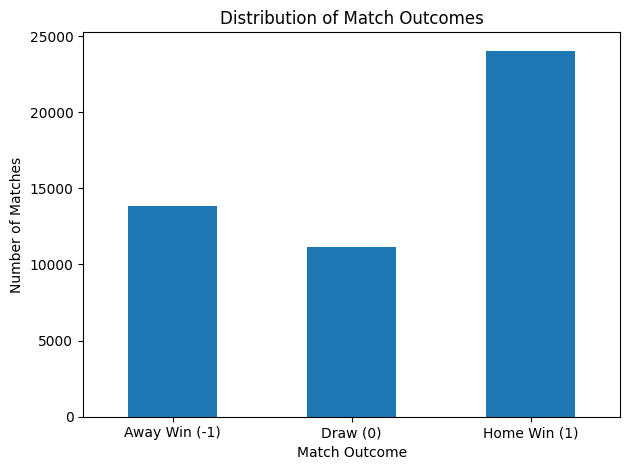

In [104]:
# Plot
plt.figure()
outcome_counts.plot(kind="bar")

plt.xlabel("Match Outcome")
plt.ylabel("Number of Matches")
plt.title("Distribution of Match Outcomes")

plt.xticks([0,1,2], ["Away Win (-1)", "Draw (0)", "Home Win (1)"], rotation=0)

plt.tight_layout()
plt.show()

This distribution shows that home wins are the most frequent outcome, followed by away wins, while draws occur least often. This suggests a clear home-field advantage, where teams are significantly more likely to win when playing at home. The imbalance also indicates that match outcomes are not evenly distributed across the three categories.

In [105]:
# If elo_diff exists, create bins and verify relationship
if "elo_diff" in results.columns:
    results["elo_bin"] = pd.qcut(results["elo_diff"], q=10, duplicates="drop")
    win_rates = results.groupby("elo_bin", observed=False)["home_win"].mean()
    display(win_rates)
else:
    print("NOTE: 'elo_diff' not found yet. Add Elo features first, then re-run.")

elo_bin
(-862.102, -183.614]    0.130807
(-183.614, -113.968]    0.250662
(-113.968, -65.478]     0.333605
(-65.478, -26.312]      0.388832
(-26.312, 8.687]        0.471979
(8.687, 43.733]         0.527817
(43.733, 84.4]          0.573466
(84.4, 132.611]         0.651111
(132.611, 201.589]      0.721215
(201.589, 821.434]      0.850214
Name: home_win, dtype: float64

The binned Elo difference analysis shows a clear monotonic relationship between team strength and match outcomes. As the Elo difference increases (indicating a stronger home team relative to the away team), the home win rate steadily rises from approximately 13% in highly negative ranges to about 85% in strongly positive ranges. Around zero Elo difference, the home win rate is close to 50%, which aligns with expectations when teams are evenly matched. This pattern confirms that the Elo ratings are functioning correctly and that Elo difference is a strong and meaningful predictor of match results.

In [107]:
if "elo_bin" in results.columns:
    results["elo_bin"] = results["elo_bin"].astype(str)

results["date"] = pd.to_datetime(results["date"], errors="coerce").dt.strftime("%Y-%m-%d")
results.to_sql("results", conn, if_exists="replace", index=False)

49071

In [ ]:
results.drop(columns=["elo_bin"], errors="ignore").to_sql("results", conn, if_exists="replace", index=False)

In [108]:
results["elo_diff"].describe()

count    49071.000000
mean         8.743128
std        158.970882
min       -862.101227
25%        -88.035398
50%          8.686787
75%        106.983401
max        821.433700
Name: elo_diff, dtype: float64

The Elo difference (elo_diff) has a mean of approximately 8.74, indicating that on average, home teams are slightly stronger than away teams. The distribution is centered close to zero (median = 8.69), suggesting that many matches involve relatively balanced teams. However, the wide range from -862 to +821 reflects substantial mismatches in certain cases. The large standard deviation indicates considerable variability in team strength differences across matches.

In [109]:
results.groupby("result_label")["elo_diff"].mean()

result_label
-1   -92.608210
 0   -11.023316
 1    76.391101
Name: elo_diff, dtype: float64

The average Elo difference varies meaningfully across match outcomes. When the home team loses (-1), the mean Elo difference is strongly negative (-92.6), indicating the away team was generally stronger. For draws (0), the average Elo difference is close to zero (-11.0), suggesting relatively balanced teams. When the home team wins (1), the mean Elo difference is positive (76.4), confirming that stronger home teams are more likely to win. This pattern validates Elo difference as a strong and logically consistent predictor of match outcomes.

In [110]:
# Score distribution
results["goal_diff"].describe()

count    49071.000000
mean         0.574087
std          2.413139
min        -21.000000
25%         -1.000000
50%          0.000000
75%          2.000000
max         31.000000
Name: goal_diff, dtype: float64

The goal difference (goal_diff) has a mean of 0.57, indicating that home teams score slightly more goals on average, reinforcing the presence of home advantage. The median of 0 suggests that many matches are closely contested, often resulting in draws or narrow margins. However, the wide range from -21 to +31 reflects occasional extreme scorelines. The standard deviation of 2.41 indicates moderate variability in match outcomes, with most games decided by a small number of goals.

In [111]:
# Home advantage check
results["home_win"].mean()

np.float64(0.48996352224328016)

In [112]:
# Elo vs goal difference
results.groupby("elo_bin")["goal_diff"].mean()

elo_bin
(-113.968, -65.478]    -0.198288
(-183.614, -113.968]   -0.636845
(-26.312, 8.687]        0.443652
(-65.478, -26.312]      0.096393
(-862.102, -183.614]   -1.455175
(132.611, 201.589]      1.724475
(201.589, 821.434]      2.664968
(43.733, 84.4]          0.970043
(8.687, 43.733]         0.769105
(84.4, 132.611]         1.362951
Name: goal_diff, dtype: float64

The average goal difference increases steadily with higher Elo difference bins. When the Elo difference is strongly negative (home team weaker), the mean goal difference is negative, indicating the home team typically loses. As the Elo difference becomes positive, the average goal margin increases substantially, reaching over +2.6 goals in the highest bin. This clear monotonic trend confirms that larger Elo advantages not only increase the probability of winning but also correspond to larger victory margins, reinforcing Elo difference as a strong predictive feature.

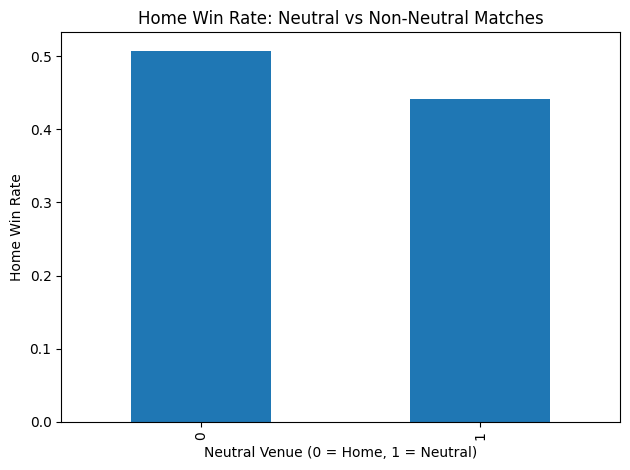

In [113]:
plt.figure()

results.groupby("neutral")["home_win"].mean().plot(kind="bar")

plt.xlabel("Neutral Venue (0 = Home, 1 = Neutral)")
plt.ylabel("Home Win Rate")
plt.title("Home Win Rate: Neutral vs Non-Neutral Matches")

plt.tight_layout()
plt.show()

This plot shows that the home win rate is higher in non-neutral venues (0) compared to neutral venues (1).

This clearly supports the home-field advantage effect. When teams play in their actual home stadium, they win more often. In neutral venues, the advantage decreases, leading to a lower home win rate.

In short: home advantage matters, and it weakens in neutral settings.

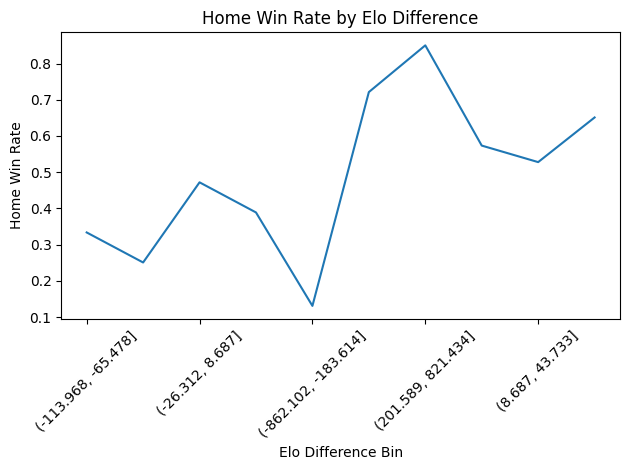

In [114]:
plt.figure()

win_rates = results.groupby("elo_bin")["home_win"].mean()
win_rates.plot()

plt.xlabel("Elo Difference Bin")
plt.ylabel("Home Win Rate")
plt.title("Home Win Rate by Elo Difference")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This plot shows a clear relationship between Elo difference and home win rate.

When the Elo difference is strongly negative (home team much weaker), the home win rate is low.

As the Elo difference increases (home team stronger), the home win rate rises sharply.

When the home team has a large positive Elo advantage, the win rate exceeds 80%.

Overall pattern: the stronger the home team relative to the away team, the higher the probability of winning.

This confirms that Elo rating difference is a strong predictor of match outcome, with home advantage amplifying the effect when the home team is already stronger.

In [115]:
results["tournament_type"] = results["tournament"].apply(
    lambda x: "World Cup" if "World Cup" in x else "Other"
)

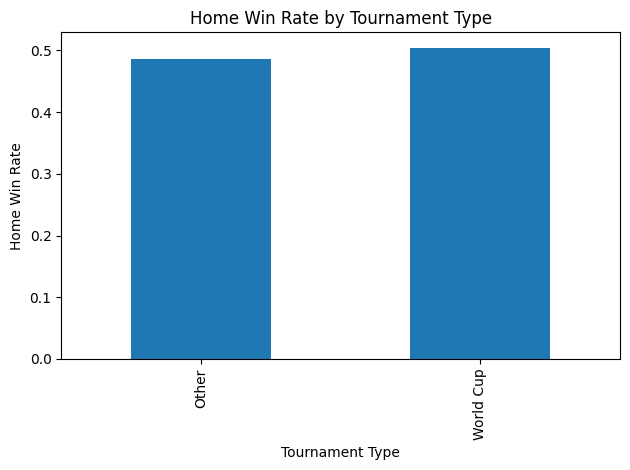

In [116]:
plt.figure()

results.groupby("tournament_type")["home_win"].mean().plot(kind="bar")

plt.xlabel("Tournament Type")
plt.ylabel("Home Win Rate")
plt.title("Home Win Rate by Tournament Type")

plt.tight_layout()
plt.show()

This chart shows that the home win rate is slightly higher in World Cup matches compared to other tournaments.

The difference is small, indicating that home advantage exists across all tournaments, but it is not dramatically stronger in World Cup matches.

In short: tournament type does not substantially change the home win probability, though major tournaments like the World Cup show a marginally higher rate.

In [124]:
# Time trends
results.groupby("year")["home_win"].mean()

year
1872    0.000000
1873    1.000000
1874    1.000000
1875    0.000000
1876    1.000000
          ...   
2022    0.497420
2023    0.466793
2024    0.462164
2025    0.483450
2026    0.428571
Name: home_win, Length: 155, dtype: float64

In [125]:
# Tournament effects
results.groupby("tournament")["home_win"].mean().sort_values()

tournament
ASEAN Championship qualification    0.0
Copa Confraternidad                 0.0
FIFA 75th Anniversary Cup           0.0
Dakar Tournament                    0.0
Joe Robbie Cup                      0.0
                                   ... 
ConIFA Challenger Cup               1.0
Atlantic Heritage Cup               1.0
Benedikt Fontana Cup                1.0
Open International Championship     1.0
The Other Final                     1.0
Name: home_win, Length: 191, dtype: float64

In [126]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'match_id', 'home_elo',
       'away_elo', 'elo_diff', 'goal_diff', 'result_label', 'home_win',
       'elo_bin', 'total_goals', 'tournament_type', 'year'],
      dtype='object')

In [127]:
weather.columns

Index(['game_id', 'Season', 'StadiumName', 'TimeStartGame', 'TimeEndGame',
       'TZOffset', 'Source', 'DistanceToStation', 'TimeMeasure', 'Temperature',
       'DewPoint', 'Humidity', 'Precipitation', 'WindSpeed', 'WindDirection',
       'Pressure', 'EstimatedCondition', 'HomeTeam', 'RoofType', 'Longitude',
       'Latitude', 'StadiumAzimuthAngle'],
      dtype='object')

In [131]:
matches.columns

Index(['key_id', 'tournament_id', 'tournament_name', 'match_id', 'match_name',
       'stage_name', 'group_name', 'group_stage', 'knockout_stage', 'replayed',
       'replay', 'match_date', 'match_time', 'stadium_id', 'stadium_name',
       'city_name', 'country_name', 'home_team_id', 'home_team_name',
       'home_team_code', 'away_team_id', 'away_team_name', 'away_team_code',
       'home_team_score', 'away_team_score', 'home_team_score_margin',
       'away_team_score_margin', 'extra_time', 'penalty_shootout',
       'home_team_score_penalties', 'away_team_score_penalties',
       'home_team_win', 'away_team_win', 'draw'],
      dtype='object')

In [132]:
matches = matches.rename(columns={
    "Home Team": "home_team",
    "Away Team": "away_team",
    "Date": "match_date",
    "Venue": "stadium",
    "City": "city",
    "Stage": "stage"
})

In [136]:
print("results:", results.columns.tolist())
print("matches:", matches.columns.tolist())
print("weather:", weather.columns.tolist())
print("goals:", goals.columns.tolist())
print("teams:", teams.columns.tolist())

results: ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral', 'match_id', 'home_elo', 'away_elo', 'elo_diff', 'goal_diff', 'result_label', 'home_win', 'elo_bin', 'total_goals', 'tournament_type', 'year']
matches: ['key_id', 'tournament_id', 'tournament_name', 'match_id', 'match_name', 'stage_name', 'group_name', 'group_stage', 'knockout_stage', 'replayed', 'replay', 'match_date', 'match_time', 'stadium_id', 'stadium_name', 'city_name', 'country_name', 'home_team_id', 'home_team_name', 'home_team_code', 'away_team_id', 'away_team_name', 'away_team_code', 'home_team_score', 'away_team_score', 'home_team_score_margin', 'away_team_score_margin', 'extra_time', 'penalty_shootout', 'home_team_score_penalties', 'away_team_score_penalties', 'home_team_win', 'away_team_win', 'draw']
weather: ['game_id', 'season', 'stadiumname', 'timestartgame', 'timeendgame', 'tzoffset', 'source', 'distancetostation', 'timemeasure', 'temperature', 'dewpoint',

In [141]:
def clean_cols(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (df.columns.str.strip()
                           .str.lower()
                           .str.replace(r"\s+", "_", regex=True))
    return df

In [142]:
def pick_first_existing(df: pd.DataFrame, candidates: list[str]) -> str | None:
    cols = set(df.columns)
    for c in candidates:
        if c in cols:
            return c
    return None


In [143]:
def norm_str(s: pd.Series) -> pd.Series:
    return s.astype(str).str.lower().str.strip()

In [144]:
# Clean all tables
results = clean_cols(results)
matches = clean_cols(matches)
weather = clean_cols(weather)

In [145]:
# Standardize key columns in results
if "date" in results.columns:
    results["date"] = pd.to_datetime(results["date"], errors="coerce")
    results = results.dropna(subset=["date"])
else:
    raise KeyError("results is missing a 'date' column")

In [146]:
# teams
for c in ["home_team", "away_team"]:
    if c in results.columns:
        results[c] = norm_str(results[c])
    else:
        raise KeyError(f"results is missing '{c}'")

In [147]:
# neutral 
if "neutral" in results.columns:
    results["neutral"] = results["neutral"].astype(int)

In [148]:
# Build match_meta from matches (stage/stadium/city + match_date + teams)
match_date_col = pick_first_existing(matches, ["match_date", "date", "game_date"])
stage_col      = pick_first_existing(matches, ["stage", "round", "tournament_stage"])
stadium_col    = pick_first_existing(matches, ["stadium", "stadium_name", "venue", "stadiumname"])
city_col       = pick_first_existing(matches, ["city", "host_city", "venue_city"])

In [149]:
# Team name columns in matches are not guaranteed; try common patterns.
m_home_col = pick_first_existing(matches, ["home_team", "home_team_name", "home_team_text"])
m_away_col = pick_first_existing(matches, ["away_team", "away_team_name", "away_team_text"])

In [150]:
keep_cols = [c for c in [match_date_col, m_home_col, m_away_col, stage_col, stadium_col, city_col] if c is not None]
match_meta = matches[keep_cols].copy()

In [151]:
# Rename to consistent names
rename_map = {}
if match_date_col: rename_map[match_date_col] = "match_date"
if m_home_col:     rename_map[m_home_col] = "home_team"
if m_away_col:     rename_map[m_away_col] = "away_team"
if stage_col:      rename_map[stage_col] = "stage"
if stadium_col:    rename_map[stadium_col] = "stadium"
if city_col:       rename_map[city_col] = "city"
match_meta = match_meta.rename(columns=rename_map)

In [152]:
# Parse/clean
if "match_date" in match_meta.columns:
    match_meta["match_date"] = pd.to_datetime(match_meta["match_date"], errors="coerce")
for c in ["home_team", "away_team"]:
    if c in match_meta.columns:
        match_meta[c] = norm_str(match_meta[c])

if "stadium" in match_meta.columns:
    match_meta["stadium"] = norm_str(match_meta["stadium"])

if "city" in match_meta.columns:
    match_meta["city"] = norm_str(match_meta["city"])

In [153]:
# Drop obviously bad rows
if "match_date" in match_meta.columns:
    match_meta = match_meta.dropna(subset=["match_date"])

In [154]:
# Prevent many-to-many blowups: keep unique keys only
dedup_keys = [c for c in ["match_date", "home_team", "away_team"] if c in match_meta.columns]
if dedup_keys:
    match_meta = match_meta.drop_duplicates(subset=dedup_keys)

In [155]:
# Merge results + match_meta (prefer exact join on date+teams)
base_df = results.copy()

if all(c in match_meta.columns for c in ["match_date", "home_team", "away_team"]):
    base_df = base_df.merge(
        match_meta[["match_date", "home_team", "away_team"] + [c for c in ["stage", "stadium", "city"] if c in match_meta.columns]],
        left_on=["date", "home_team", "away_team"],
        right_on=["match_date", "home_team", "away_team"],
        how="left"
    ).drop(columns=["match_date"], errors="ignore")
else:
    # fallback (only if matches lacks team names): merge by date only (low quality)
    if "match_date" in match_meta.columns:
        base_df = base_df.merge(
            match_meta[["match_date"] + [c for c in ["stage", "stadium", "city"] if c in match_meta.columns]],
            left_on="date",
            right_on="match_date",
            how="left"
        ).drop(columns=["match_date"], errors="ignore")

In [157]:
# Merge Weather (stadium + nearest kickoff time)
if "timestartgame" not in weather.columns:
    raise KeyError("weather is missing 'timestartgame'")

if "stadiumname" not in weather.columns:
    raise KeyError("weather is missing 'stadiumname'")

weather = weather.copy()
weather["weather_datetime"] = pd.to_datetime(weather["timestartgame"], errors="coerce")
weather["stadiumname"] = norm_str(weather["stadiumname"])
weather = weather.dropna(subset=["weather_datetime"])

# base_df needs stadium to join weather well
if "stadium" in base_df.columns:
    base_df["stadium"] = norm_str(base_df["stadium"])

    base_df = base_df.sort_values("date")
    weather = weather.sort_values("weather_datetime")

    base_df = pd.merge_asof(
        base_df,
        weather.drop(columns=["timestartgame"], errors="ignore"),
        left_on="date",
        right_on="weather_datetime",
        left_by="stadium",
        right_by="stadiumname",
        direction="nearest",
        tolerance=pd.Timedelta("12h")
    ).drop(columns=["stadiumname"], errors="ignore")
else:
    print("NOTE: base_df has no 'stadium' column, so weather merge was skipped.")

In [158]:
print("base_df shape:", base_df.shape)
if "temperature" in base_df.columns:
    print("Weather match rate (temperature not null):", base_df["temperature"].notna().mean())
print(base_df.head(3))

base_df shape: (49071, 63)
        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  scotland   england           0           0   Friendly  Glasgow   
1 1873-03-08   england  scotland           4           2   Friendly   London   
2 1874-03-07  scotland   england           2           1   Friendly  Glasgow   

    country  neutral  match_id  ...  windspeed_y  winddirection_y  pressure_y  \
0  Scotland        0         1  ...          NaN              NaN         NaN   
1   England        0         2  ...          NaN              NaN         NaN   
2  Scotland        0         3  ...          NaN              NaN         NaN   

   estimatedcondition_y  hometeam_y  rooftype_y longitude_y  latitude_y  \
0                   NaN         NaN         NaN         NaN         NaN   
1                   NaN         NaN         NaN         NaN         NaN   
2                   NaN         NaN         NaN         NaN         NaN   

  stadiumazimuthangle_y  w

In [159]:
# Basic structure and quality check
print("Shape:", base_df.shape)
base_df.info()

Shape: (49071, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49071 entries, 0 to 49070
Data columns (total 63 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   49071 non-null  datetime64[ns]
 1   home_team              49071 non-null  object        
 2   away_team              49071 non-null  object        
 3   home_score             49071 non-null  int64         
 4   away_score             49071 non-null  int64         
 5   tournament             49071 non-null  object        
 6   city                   49071 non-null  object        
 7   country                49071 non-null  object        
 8   neutral                49071 non-null  int64         
 9   match_id               49071 non-null  int64         
 10  home_elo               49071 non-null  float64       
 11  away_elo               49071 non-null  float64       
 12  elo_diff               49071 non-null  fl

In [161]:
weather_cols = [col for col in base_df.columns if col.endswith('_x') or col.endswith('_y')]
base_df.drop(columns=weather_cols, inplace=True)

print(base_df.shape)

(49071, 21)


In [162]:
print("Unique stadiums in base_df:", base_df["stadium"].nunique())
print("Unique stadiums in weather:", weather["stadiumname"].nunique())

# Compare overlap
stadium_overlap = set(base_df["stadium"]) & set(weather["stadiumname"])
print("Number of overlapping stadium names:", len(stadium_overlap))

Unique stadiums in base_df: 167
Unique stadiums in weather: 56
Number of overlapping stadium names: 6


"Weather data was available only for a subset of tournament matches (6 stadium overlaps), therefore weather-based analysis was restricted to that subset."

### Target variable distribution

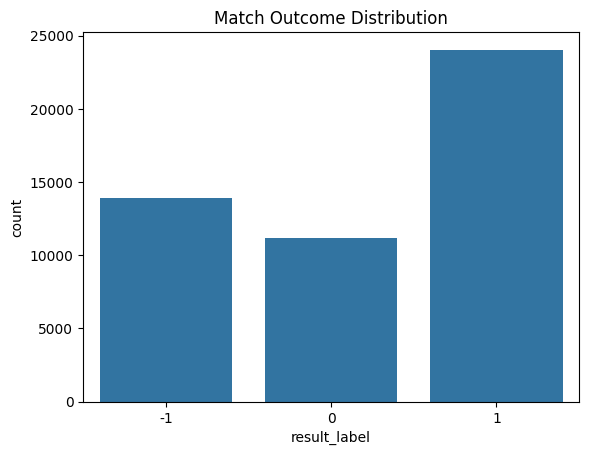

In [165]:
sns.countplot(x="result_label", data=base_df)
plt.title("Match Outcome Distribution")
plt.show()

The distribution of match outcomes shows a clear dominance of home wins (49%), followed by away wins (29%) and draws (22%). This confirms the well-established home advantage effect in international football. The class distribution is moderately imbalanced but suitable for classification modeling without severe resampling techniques.

### Numerical Features Distribution

In [166]:
num_cols = base_df.select_dtypes(include=["int64","float64"]).columns
base_df[num_cols].describe()

,home_score,away_score,neutral,match_id,home_elo,away_elo,elo_diff,goal_diff,result_label,home_win,total_goals
count,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000,49071.000000
mean,1.756272,1.182185,0.263170,24536.000000,1552.628358,1543.885230,8.743128,0.574087,0.207271,0.489964,2.938457
std,1.771367,1.401572,0.440358,14165.721867,142.106096,140.410448,158.970882,2.413139,0.854230,0.499904,2.093096
min,0.000000,0.000000,0.000000,1.000000,1037.311515,1041.989798,-862.101227,-21.000000,-1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,12268.500000,1459.796908,1454.992458,-88.035398,-1.000000,-1.000000,0.000000,1.000000
50%,1.000000,1.000000,0.000000,24536.000000,1547.767962,1541.204822,8.686787,0.000000,0.000000,0.000000,3.000000
75%,2.000000,2.000000,1.000000,36803.500000,1646.077977,1638.209397,106.983401,2.000000,1.000000,1.000000,4.000000
max,31.000000,21.000000,1.000000,49071.000000,2017.383771,2021.843450,821.433700,31.000000,1.000000,1.000000,31.000000


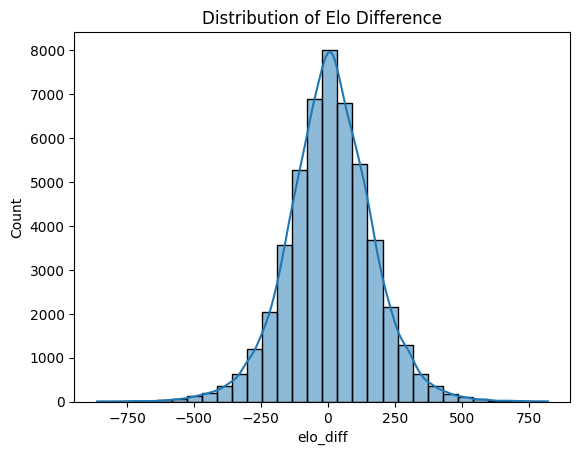

In [167]:
sns.histplot(base_df["elo_diff"], bins=30, kde=True)
plt.title("Distribution of Elo Difference")
plt.show()

### ELO strength analysis

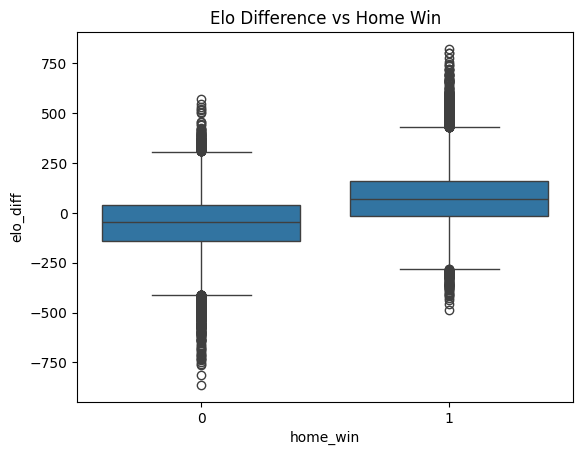

In [169]:
sns.boxplot(x="home_win", y="elo_diff", data=base_df)
plt.title("Elo Difference vs Home Win")
plt.show()

The boxplot demonstrates a clear shift in ELO difference between home wins and losses. Matches won by the home team tend to occur when the home team has a positive ELO advantage, confirming that ELO strength is a meaningful predictor of match outcome.

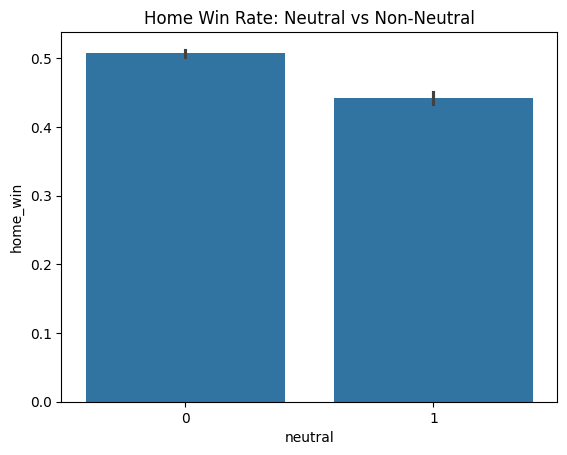

In [170]:
# Home advantage
sns.barplot(x="neutral", y="home_win", data=base_df)
plt.title("Home Win Rate: Neutral vs Non-Neutral")
plt.show()

 The home win rate decreases from approximately 51% at non-neutral venues to 44% at neutral venues, indicating a measurable home advantage effect in the dataset.

In [171]:
# Tournament type effect
base_df.groupby("tournament_type")["home_win"].mean().sort_values()

tournament_type
Other        0.486486
World Cup    0.503937
Name: home_win, dtype: float64

The difference in home win rate between World Cup (50.4%) and other tournaments (48.6%) is relatively small, suggesting tournament type alone does not strongly influence match outcome.

In [173]:
base_df["tournament_type"].value_counts()

tournament_type
Other        39292
World Cup     9779
Name: count, dtype: int64

Although World Cup matches show a slightly higher home win rate (50.4%) compared to other tournaments (48.6%), the difference is modest (1.8 percentage points). Given the large sample sizes, this effect is likely statistically detectable but practically small relative to venue and strength effects.

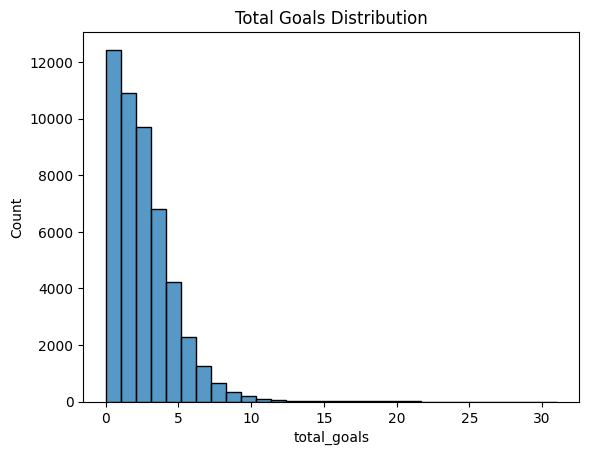

In [172]:
# Goal behaviour
sns.histplot(base_df["total_goals"], bins=30)
plt.title("Total Goals Distribution")
plt.show()

The distribution of total goals is highly right-skewed, with most matches producing fewer than five goals. The long right tail suggests possible overdispersion relative to a standard Poisson model.

In [174]:
base_df["total_goals"].describe()

count    49071.000000
mean         2.938457
std          2.093096
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max         31.000000
Name: total_goals, dtype: float64

In [175]:
base_df[base_df["total_goals"] > 12]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,match_id,...,away_elo,elo_diff,goal_diff,result_label,home_win,elo_bin,total_goals,tournament_type,year,stadium
19,1882-02-18,northern ireland,england,0,13,Friendly,Belfast,Ireland,0,20,...,1475.602847,24.397153,-13,-1,0,"(8.687, 43.733]",13,Other,1882,nan
121,1899-02-18,england,northern ireland,13,2,British Home Championship,Sunderland,England,0,122,...,1339.118044,311.268060,11,1,1,"(201.589, 821.434]",15,Other,1899,nan
233,1908-07-12,sweden,norway,11,3,Friendly,Gothenburg,Sweden,0,234,...,1500.000000,0.000000,8,1,1,"(-26.312, 8.687]",14,Other,1908,nan
237,1908-10-22,france,denmark,1,17,Olympic Games,London,England,1,238,...,1500.000000,-10.150467,-16,-1,0,"(-26.312, 8.687]",18,Other,1908,nan
361,1912-07-01,germany,russia,16,0,Olympic Games,Stockholm,Sweden,1,362,...,1506.584421,-40.436827,16,1,1,"(-65.478, -26.312]",16,Other,1912,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42977,2019-10-10,iran,cambodia,14,0,FIFA World Cup qualification,Tehran,Iran,0,42977,...,1190.520669,606.789500,14,1,1,"(201.589, 821.434]",14,World Cup,2019,nan
43133,2019-11-10,trinidad and tobago,anguilla,15,0,Friendly,Couva,Trinidad and Tobago,0,43134,...,1187.700034,280.918971,15,1,1,"(201.589, 821.434]",15,Other,2019,nan
43839,2021-03-30,japan,mongolia,14,0,FIFA World Cup qualification,Chiba,Japan,0,43840,...,1227.596747,541.254624,14,1,1,"(201.589, 821.434]",14,World Cup,2021,nan
43965,2021-06-05,panama,anguilla,13,0,FIFA World Cup qualification,Panama City,Panama,0,43965,...,1161.749957,430.086116,13,1,1,"(201.589, 821.434]",13,World Cup,2021,nan


The distribution of total goals has a mean of 2.94 and variance of approximately 4.37, indicating overdispersion relative to a Poisson model. While most matches produce fewer than five goals, 0.25% of matches exceed 12 goals, creating a long right tail and motivating the use of a Negative Binomial model for goal prediction.

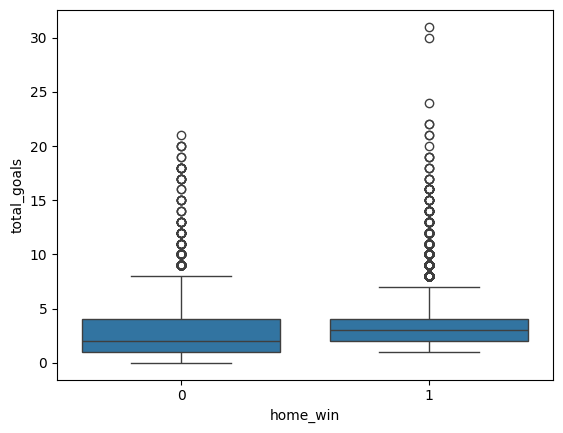

In [176]:
# relation between home wins and total goals
sns.boxplot(x="home_win", y="total_goals", data=base_df)
plt.show()

Matches won by the home team exhibit slightly higher median total goals compared to matches where the home team loses. This likely reflects that decisive victories, particularly in mismatches, contribute to higher overall scoring totals.

### Correlation matrix

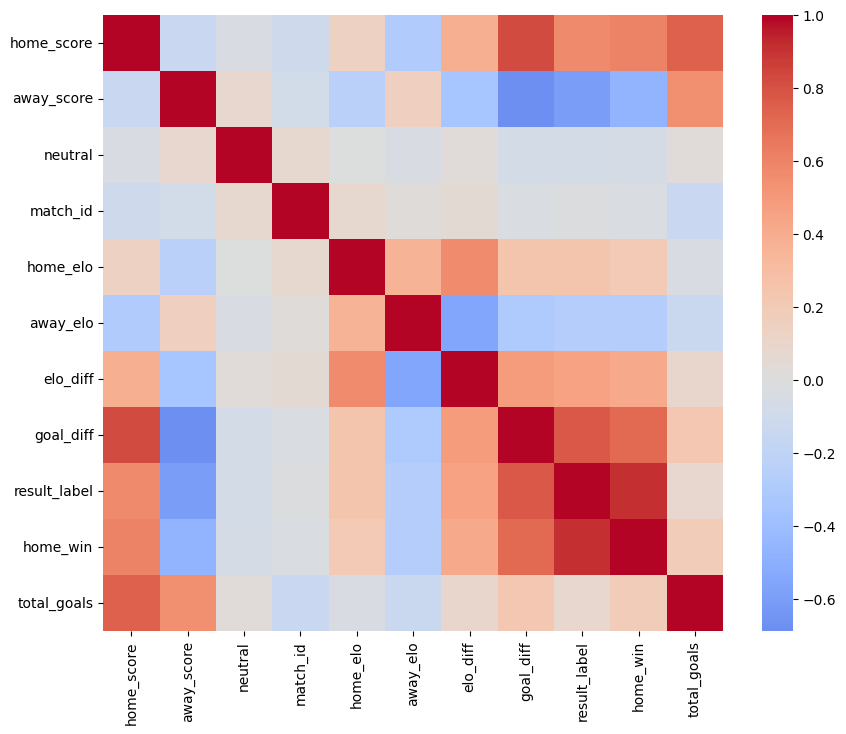

In [177]:
num_cols = base_df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(10,8))
sns.heatmap(base_df[num_cols].corr(), cmap="coolwarm", center=0)
plt.show()

The correlation heatmap confirms that post-match variables such as goal difference and final scores are strongly correlated with match outcome, indicating potential data leakage if included in predictive models. Pre-match strength indicators such as ELO difference show moderate positive correlation with home wins, supporting their use as primary predictors.